In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel(rf"C:\Users\thuhi\Downloads\rating sheet (5).xlsx")

df.drop(columns=["Corporation size","Financial indicators"],inplace=True)

# Replace any string that is only whitespace with np.nan, then convert to float
df["Diversity & Inclusion"] = df["Diversity & Inclusion"].replace(r'^\s*$', np.nan, regex=True)
df["Diversity & Inclusion"] = pd.to_numeric(df["Diversity & Inclusion"], errors='coerce')


C:\Users\thuhi\AppData\Local\Temp\ipykernel_11240\26428541.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Diversity & Inclusion"] = df["Diversity & Inclusion"].replace(r'^\s*$', np.nan, regex=True)


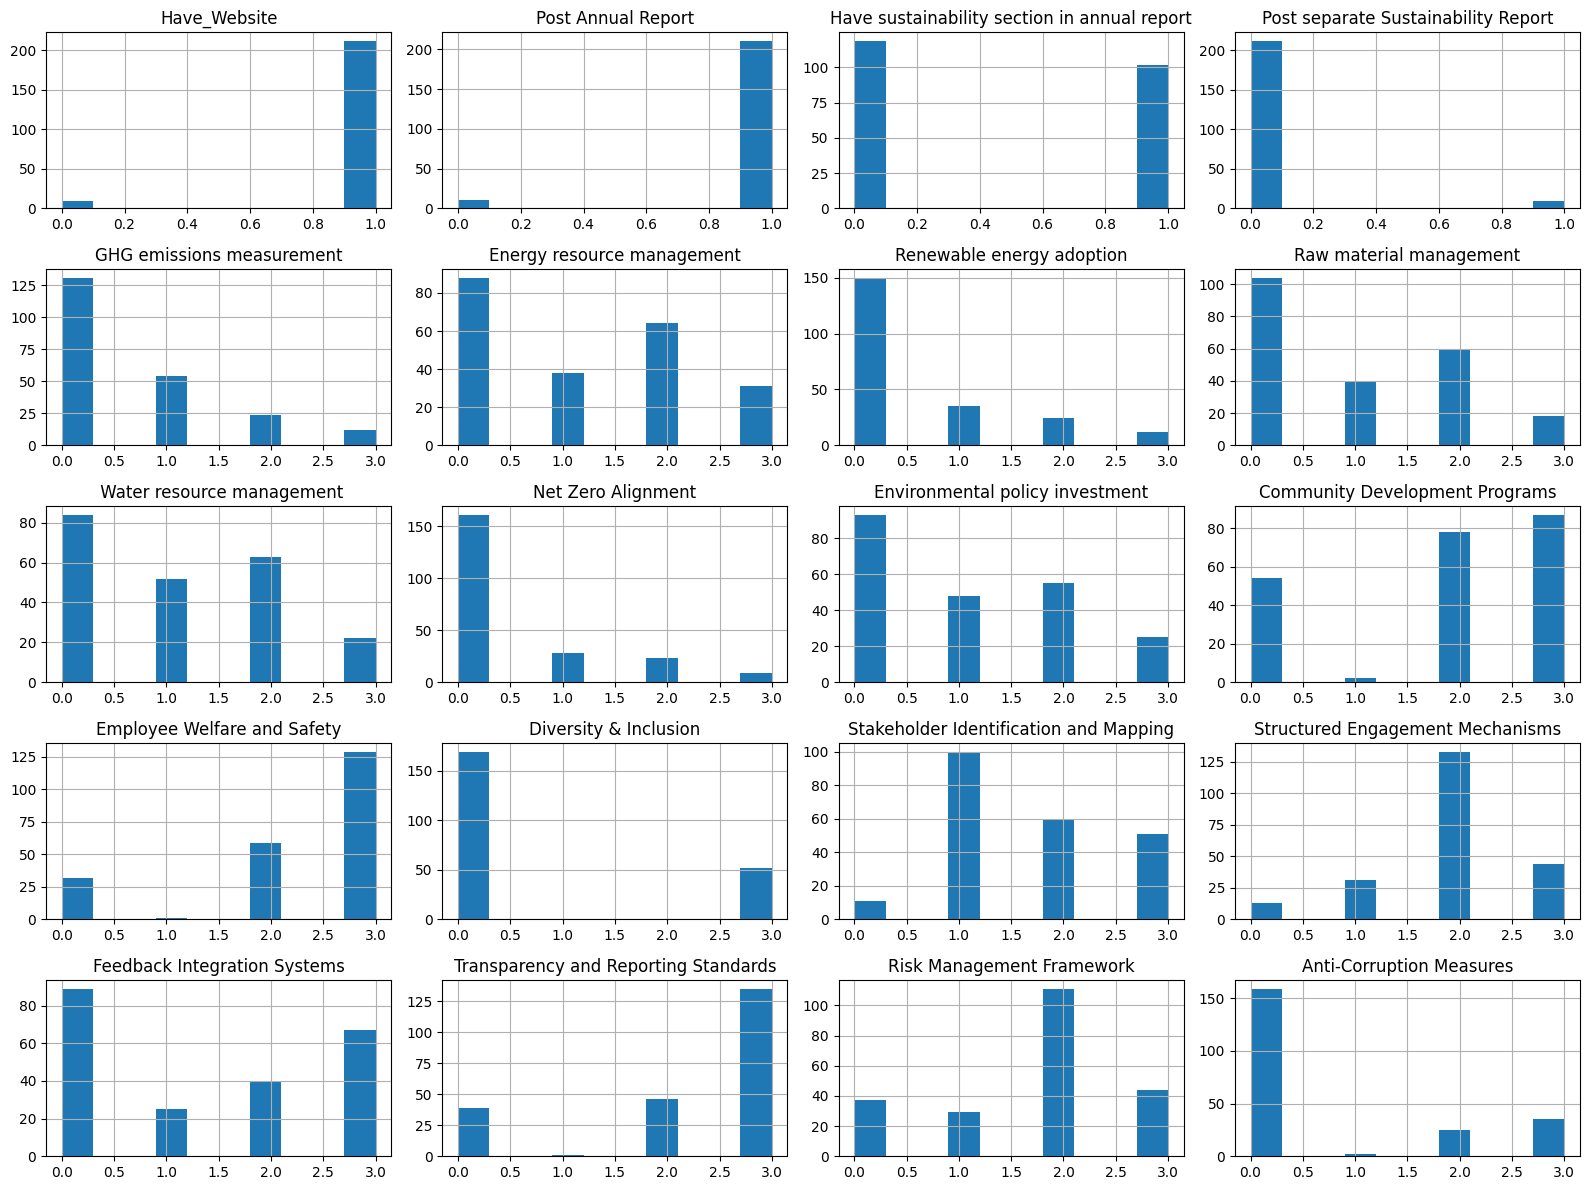

In [5]:
# Plot histogram for all score columns in df
score_cols = [
    "Have_Website",
    "Post Annual Report",
    "Have sustainability section in annual report",
    "Post separate Sustainability Report",
    "GHG emissions measurement",
    "Energy resource management",
    "Renewable energy adoption",
    "Raw material management",
    " Water resource management",
    "Net Zero Alignment",
    "Environmental policy investment",
    "Community Development Programs",
    "Employee Welfare and Safety",
    "Diversity & Inclusion",
    "Stakeholder Identification and Mapping",
    "Structured Engagement Mechanisms",
    "Feedback Integration Systems",
    "Transparency and Reporting Standards",
    "Risk Management Framework",
    "Anti-Corruption Measures"
]
df[score_cols]=df[score_cols].fillna(0)
df[score_cols].hist(figsize=(16, 12), bins=10, layout=(5, 4))
plt.tight_layout()
plt.show()

In [6]:



import matplotlib.pyplot as plt

# Calculate mean of scores and unique count of company names per group
# Calculate environment, social, governance columns for df before grouping
df = df.copy()
df['environment'] = (
    df['GHG emissions measurement'] +
    df['Energy resource management'] +
    df['Renewable energy adoption'] +
    df['Raw material management'] +
    df[' Water resource management'] +
    df['Net Zero Alignment'] +
    df['Environmental policy investment']
)
df['social'] = (
    df['Community Development Programs'] +
    df['Employee Welfare and Safety'] +
    df['Diversity & Inclusion']
)
df['governance'] = (
    df['Stakeholder Identification and Mapping'] +
    df['Structured Engagement Mechanisms'] +
    df['Feedback Integration Systems'] +
    df['Transparency and Reporting Standards'] +
    df['Risk Management Framework'] +
    df['Anti-Corruption Measures']
)

scores = [
    "environment",
    "social",
    "governance"
]

mean_scores = df.groupby(["Industry_Group", "Year"])[scores].mean()
name_count = df.groupby(["Industry_Group"])["Name"].nunique().rename("unique_count")
year_count = df.groupby(["Industry_Group","Year"])["Name"].count().rename("year_count")
# Combine mean scores and name count into a single DataFrame
mean_scores = mean_scores.join(name_count)

mean_scores = mean_scores.join(year_count)

In [7]:
mean_scores[['environment','social','governance','unique_count','year_count']]

environment    social  governance  unique_count  \
Industry_Group Year                                                      
G1             2014.0     3.200000  3.500000    9.500000            26   
               2015.0     3.888889  4.555556    9.222222            26   
               2016.0     5.555556  5.333333    9.444444            26   
               2017.0     4.500000  4.750000    8.750000            26   
               2018.0     5.500000  4.916667    8.750000            26   
               2019.0     5.666667  4.666667    8.833333            26   
               2020.0     6.750000  5.583333    9.000000            26   
               2021.0     7.000000  5.666667    9.166667            26   
               2022.0     7.916667  5.583333    9.166667            26   
               2023.0     8.000000  5.666667    9.333333            26   
               2024.0     6.800000  5.200000    8.500000            26   
G2             2014.0     0.333333  3.666667   10.000000            10   
               2015.0     0.666667  4.000000    9.666667            10   
               2016.0     1.000000  4.666667    9.666667            10   
               2017.0     2.400000  3.800000    8.000000            10   
               2018.0     4.400000  4.800000    9.000000            10   
               2019.0     5.200000  5.800000   10.200000            10   
               2020.0     7.000000  7.500000   11.500000            10   
               2021.0     8.333333  7.000000   13.333333            10   
               2022.0     7.000000  7.500000   11.500000            10   
               2023.0     7.000000  7.500000   11.500000            10   
               2024.0    10.000000  6.500000   11.500000            10   
G3             2014.0     4.666667  2.666667   12.333333             8   
               2015.0     3.750000  3.500000   11.500000             8   
               2016.0     4.500000  4.750000   12.250000             8   
               2017.0     4.500000  4.750000   13.000000             8   
               2018.0     4.500000  6.250000   13.000000             8   
               2019.0     6.250000  6.250000   13.250000             8   
               2020.0    11.500000  6.250000   14.000000             8   
               2021.0    11.800000  6.200000   12.600000             8   
               2022.0    13.000000  6.250000   14.000000             8   
               2023.0    12.500000  6.250000   14.000000             8   
               2024.0     8.666667  4.000000   11.666667             8   
G4             2014.0     7.000000  4.000000   11.000000             8   
               2015.0     7.000000  4.000000   11.000000             8   
               2016.0     4.000000  3.500000    9.000000             8   
               2017.0     7.000000  4.000000   11.000000             8   
               2018.0     7.000000  4.000000   11.000000             8   
               2019.0     7.000000  4.000000   11.000000             8   
               2020.0     7.000000  4.000000   11.000000             8   
               2021.0     7.000000  4.000000   11.000000             8   
               2022.0     7.000000  4.000000   11.000000             8   
               2023.0     7.000000  4.000000   11.000000             8   
               2024.0    12.333333  7.000000   13.333333             8   

                       year_count  
Industry_Group Year                
G1             2014.0          10  
               2015.0           9  
               2016.0           9  
               2017.0          12  
               2018.0          12  
               2019.0          12  
               2020.0          12  
               2021.0          12  
               2022.0          12  
               2023.0           9  
               2024.0          10  
G2             2014.0           3  
               2015.0           3  
               2016.0           3  
               2017.0           5  
      

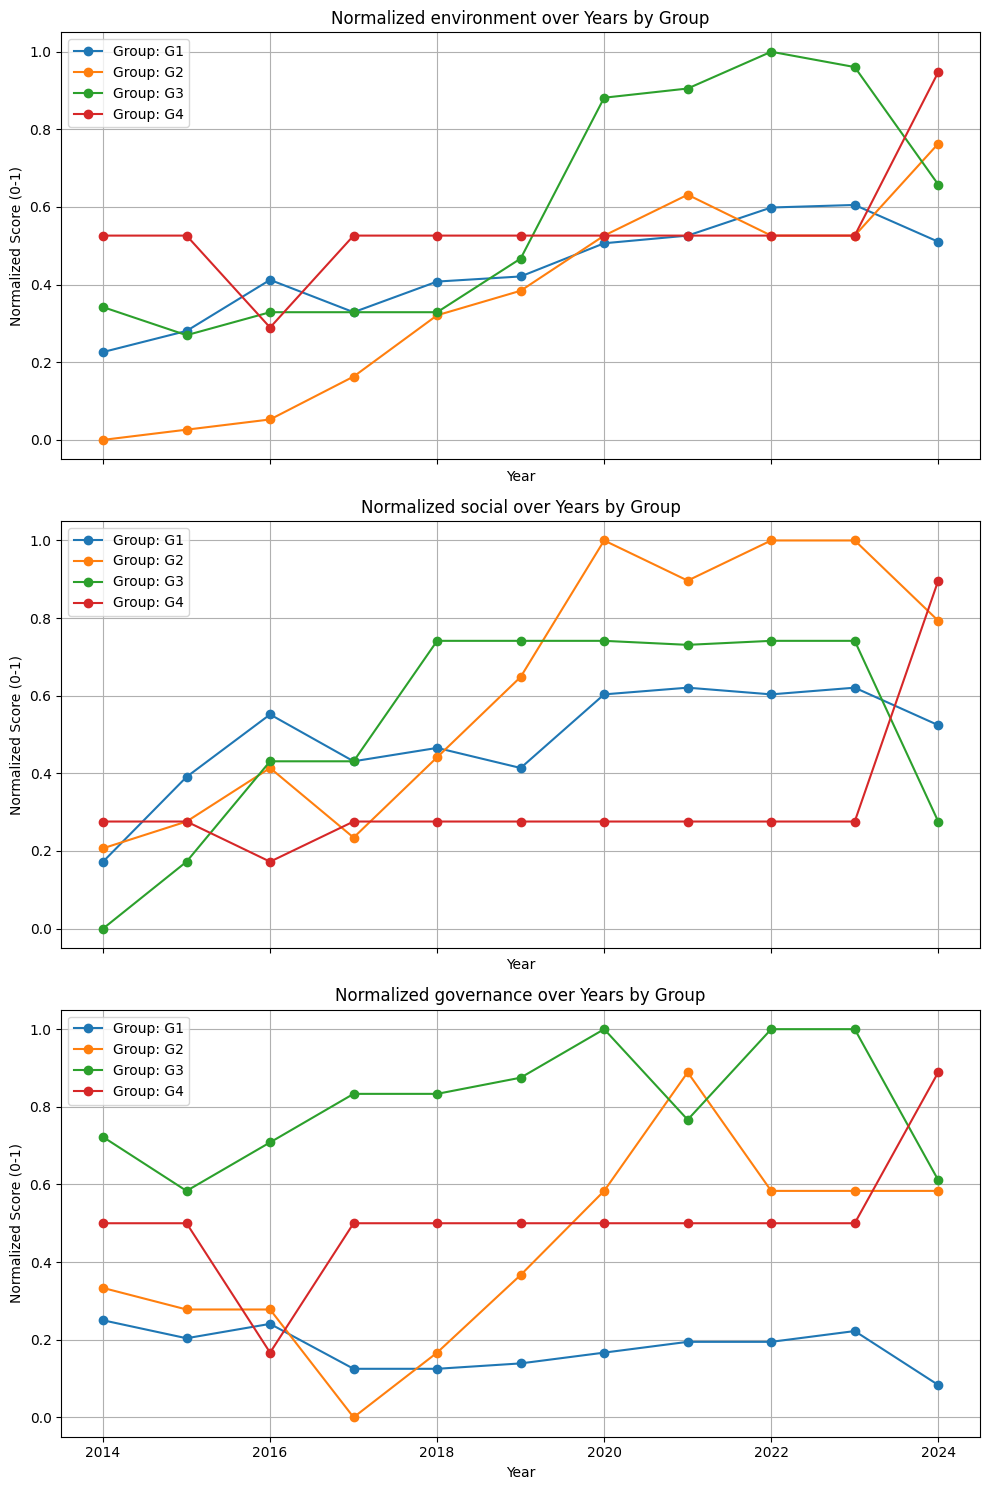

In [8]:
# --- Cell 9: Normalize mean_scores before plotting ---

from sklearn.preprocessing import MinMaxScaler

features = ['environment', 'social', 'governance']
years = mean_scores.index.get_level_values(1).unique()
groups = mean_scores.index.get_level_values(0).unique()

fig, axes = plt.subplots(len(features), 1, figsize=(10, 5 * len(features)), sharex=True)

if len(features) == 1:
    axes = [axes]

for ax, feature in zip(axes, features):
    # Collect all values for normalization
    all_values = []
    for group in groups:
        data = mean_scores.loc[group]
        all_values.extend(data[feature].values)
    scaler = MinMaxScaler()
    scaler.fit(np.array(all_values).reshape(-1, 1))
    for group in groups:
        data = mean_scores.loc[group]
        normed = scaler.transform(data[feature].values.reshape(-1, 1)).flatten()
        ax.plot(data.index, normed, marker='o', label=f'Group: {group}')
    ax.set_title(f'Normalized {feature} over Years by Group')
    ax.set_xlabel('Year')
    ax.set_ylabel('Normalized Score (0-1)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [9]:
# Group by 'Year' only and calculate mean for each score
# Group by 'Year' only and calculate mean for each score, and aggregate year_count and unique_count
# Calculate environment, social, governance columns for df before grouping
df = df.copy()
# Remove care calculation
df['environment'] = (
    df['GHG emissions measurement'] +
    df['Energy resource management'] +
    df['Renewable energy adoption'] +
    df['Raw material management'] +
    df[' Water resource management'] +
    df['Net Zero Alignment'] +
    df['Environmental policy investment']
)
df['social'] = (
    df['Community Development Programs'] +
    df['Employee Welfare and Safety'] +
    df['Diversity & Inclusion']
)
df['governance'] = (
    df['Stakeholder Identification and Mapping'] +
    df['Structured Engagement Mechanisms'] +
    df['Feedback Integration Systems'] +
    df['Transparency and Reporting Standards'] +
    df['Risk Management Framework'] +
    df['Anti-Corruption Measures']
)

yearly_scores = df.groupby('Year')[['environment', 'social', 'governance']].mean()

# Add year_count (number of records per year)
yearly_scores['year_count'] = df.groupby('Year').size()

# Add unique_count (number of unique companies per year)
yearly_scores['unique_count'] = df.groupby('Year')['Name'].nunique()



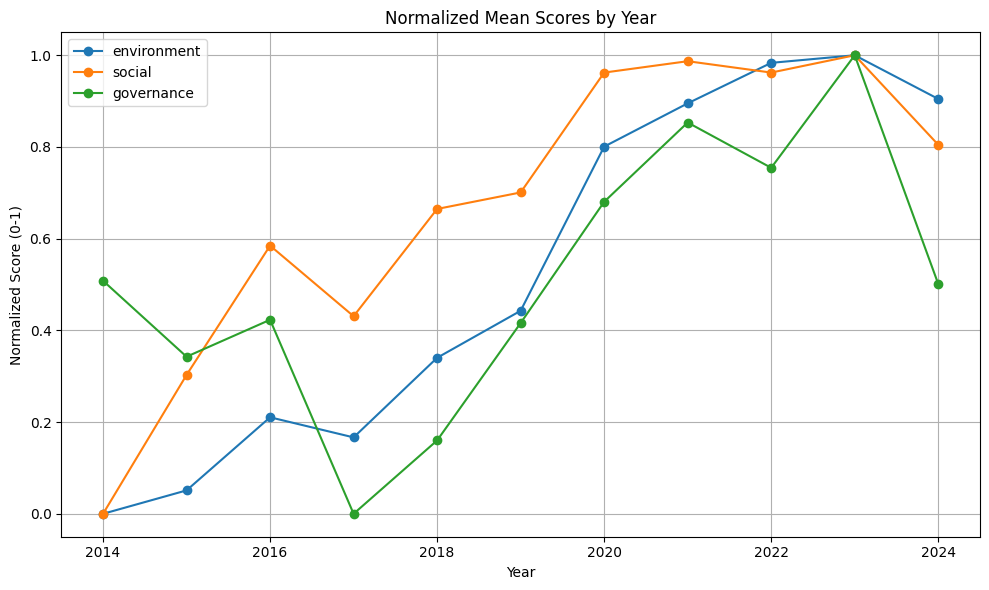

In [10]:
# --- Cell 11: Normalize yearly_scores before plotting ---

from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize=(10, 6))
for feature in ['environment', 'social', 'governance']:
    # Normalize the feature to 0-1
    values = yearly_scores[feature].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    normed = scaler.fit_transform(values).flatten()
    plt.plot(yearly_scores.index, normed, marker='o', label=feature)

plt.title('Normalized Mean Scores by Year')
plt.xlabel('Year')
plt.ylabel('Normalized Score (0-1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

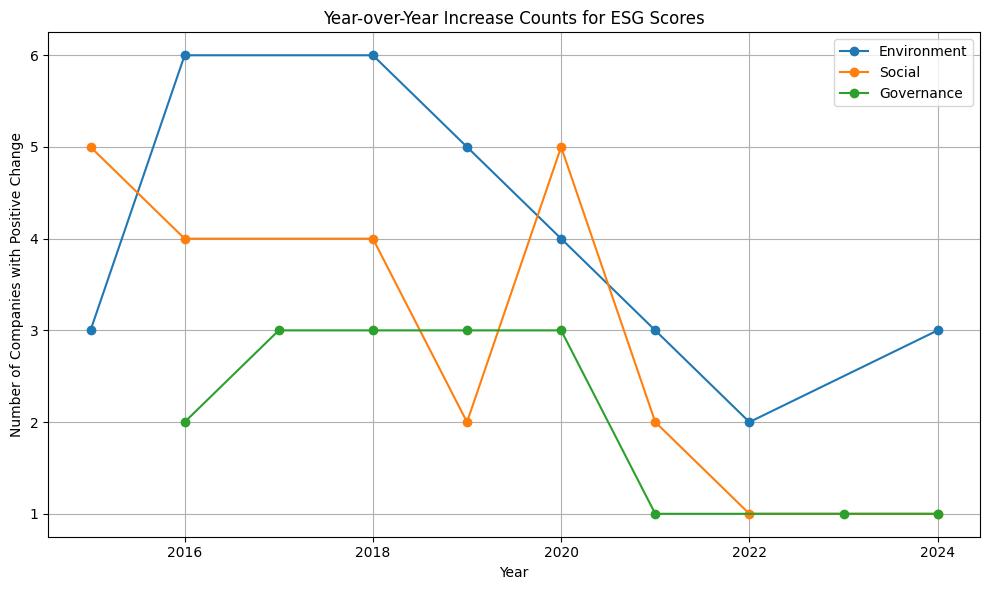

In [11]:
import matplotlib.pyplot as plt

# Calculate year-over-year increase counts for each ESG dimension
esg_cols = ['environment', 'social', 'governance']
df_sorted = df.sort_values(['Name', 'Year'])

# Calculate year-over-year difference for each company
diffs = df_sorted.groupby('Name')[esg_cols + ['Year']].apply(
    lambda group: group.set_index('Year')[esg_cols].diff()
).reset_index()

# Merge back company names for clarity
diffs['Name'] = df_sorted['Name'].values

# For each year and each ESG dimension, count companies with positive change
increase_counts = {}
for col in esg_cols:
    # Only count positive changes (exclude NaN from first year)
    yearly = diffs[diffs[col] > 0].groupby('Year')[col].count()
    increase_counts[col] = yearly

# Plot
plt.figure(figsize=(10, 6))
for col in esg_cols:
    plt.plot(increase_counts[col].index, increase_counts[col].values, marker='o', label=col.capitalize())

plt.title('Year-over-Year Increase Counts for ESG Scores')
plt.xlabel('Year')
plt.ylabel('Number of Companies with Positive Change')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Chart: Year-over-Year Increase Counts for ESG Scores

The line charts above display the annual count of companies that achieved a positive year-over-year increase in each ESG dimension—`environment`, `social`, and `governance`. For each chart, the x-axis represents the years, while the y-axis indicates the number of companies with an improvement in the respective ESG score compared to the previous year. This metric provides a dynamic view of progress, focusing on the prevalence of positive change rather than absolute score levels.

These charts are particularly useful for assessing the momentum of ESG improvement across the dataset. Peaks in the lines suggest periods when a large number of companies made significant strides in a particular dimension, potentially in response to new regulations, industry initiatives, or shifts in stakeholder expectations. Conversely, troughs may indicate challenging periods, such as economic downturns or increased operational difficulties, when fewer companies were able to advance their ESG performance.

By examining the patterns across different ESG dimensions, stakeholders can identify whether improvements are occurring in isolation or as part of a broader, coordinated effort. For example, simultaneous peaks in `environment` and `governance` may reflect the rollout of comprehensive sustainability programs, while divergent trends could signal varying levels of emphasis or success across dimensions.

The charts also facilitate the identification of persistent leaders—companies that consistently achieve year-over-year gains—and those that struggle to maintain progress. This information can inform targeted support, resource allocation, and the sharing of best practices. Additionally, the visualization helps contextualize aggregate trends, revealing whether observed improvements are widespread or concentrated among a few high performers.

In essence, these charts provide a dynamic, action-oriented perspective on ESG evolution, highlighting the frequency and distribution of positive change within the corporate landscape.

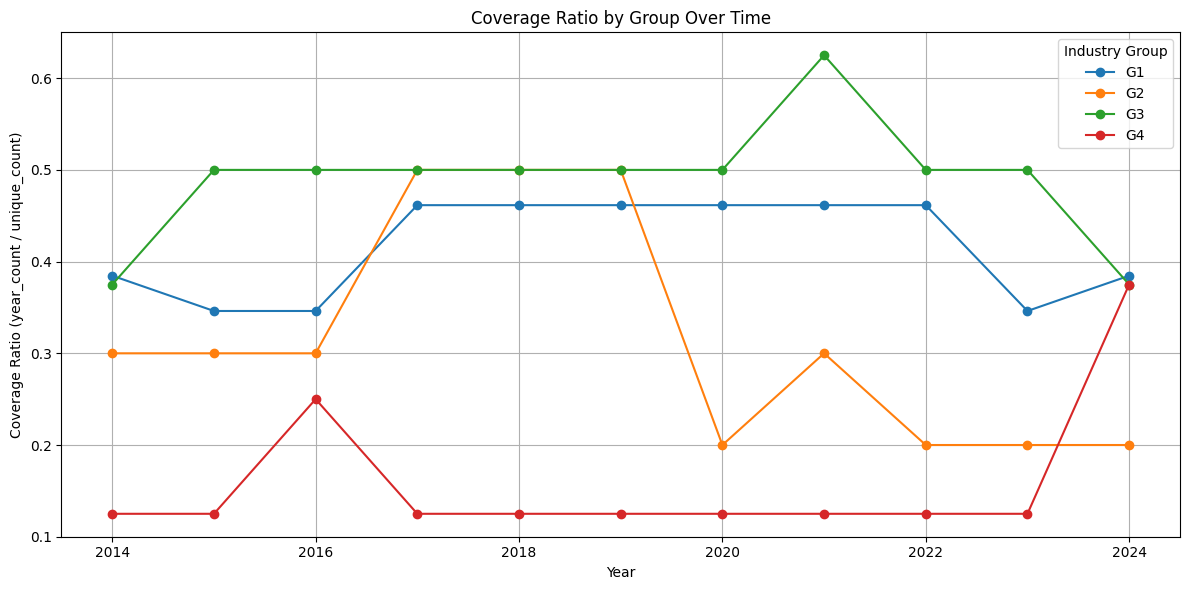

In [12]:
import matplotlib.pyplot as plt

# Calculate coverage_ratio for each group and year
mean_scores = mean_scores.copy()
mean_scores['coverage_ratio'] = mean_scores['year_count'] / mean_scores['unique_count']

groups = mean_scores.index.get_level_values(0).unique()
years = mean_scores.index.get_level_values(1).unique()

plt.figure(figsize=(12, 6))
for group in groups:
    group_data = mean_scores.loc[group]
    plt.plot(group_data.index, group_data['coverage_ratio'], marker='o', label=f'{group}')

plt.title('Coverage Ratio by Group Over Time')
plt.xlabel('Year')
plt.ylabel('Coverage Ratio (year_count / unique_count)')
plt.legend(title='Industry Group')
plt.grid(True)
plt.tight_layout()
plt.show()

### Chart: Coverage Ratio by Group Over Time

The chart above illustrates the coverage ratio for each industry group over time, where the coverage ratio is defined as the number of records (`year_count`) divided by the number of unique companies (`unique_count`) for each group and year. This metric provides insight into the consistency and completeness of ESG reporting within each group.

A coverage ratio close to 1 indicates that, on average, each unique company in the group is represented once per year, suggesting comprehensive and regular data collection. Ratios above 1 may indicate multiple records per company per year, possibly due to repeated reporting or data duplication, while ratios below 1 could signal missing data or inconsistent reporting practices.

By examining the trends in coverage ratio across groups and years, stakeholders can assess the reliability of the dataset and identify periods or groups with potential data quality issues. For example, a declining coverage ratio in a particular group may highlight challenges in data collection or reduced participation, whereas a stable or increasing ratio suggests robust and sustained engagement.

This visualization is valuable for both data analysts and decision-makers, as it contextualizes the ESG scores and trends observed elsewhere in the analysis. Understanding coverage helps ensure that observed changes in ESG performance are not artifacts of shifting data completeness, but rather reflect genuine developments within the corporate landscape.